In [1]:
from mpl_toolkits import mplot3d

from mpl_toolkits.mplot3d import axes3d    
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time
import math

#%matplotlib notebook

In [2]:
def get_random(best_para, low, high):
    flag = True
    
    for i in range(10):
        x_temp = np.random.randn() + best_para[0]
        y_temp = np.random.randn() + best_para[1]
        if x_temp >= low and x_temp <= high and y_temp >= low and y_temp <= high:
            return np.array([x_temp, y_temp],dtype=np.float32)
        else:
            continue
    return best_para
        
def get_reward(z):
    return z_function(z[0],z[1])

def isequal(best_para, temp):
    if temp[0] == best_para[0] and temp[1] == best_para[1]:
        return True
    else:
        return False

In [3]:
data = [[],[],[]]
def ploting(best_para):
    global X,Y,data
    time.sleep(.1)
    x1 = best_para[0]; y1 = best_para[1]
    fig = plt.figure()
    ax = plt.axes(projection="3d")
    ax.plot_wireframe(X, Y, Z, color='green')
    data[0].append(x1)
    data[1].append(y1)
    data[2].append(z_function(x1, y1))
    ax.scatter(data[0],data[1],data[2], s = 100, color='red')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    plt.show()
    plt.contourf(X,Y,Z, levels=[*np.linspace(-1,1,10)])
    plt.scatter(data[0],data[1],s = 50, color='red')
    plt.show()
    clear_output(wait=True)

In [4]:
low = -6
high = 6
sigma = 0.1
batch_size = 10
selection = 5
search_space_inc = 5

def z_function(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-low, high, 30)
y = np.linspace(-low, high, 30)
X, Y = np.meshgrid(x, y)
Z = z_function(X, Y)

# x1 = np.random.randint(low,high)
# y1 = np.random.randint(low,high)
x1 = -4
y1 = -4
nos = 100
best_para = np.array([x1,y1], dtype=np.float32)*sigma
best_value = -math.inf
count = 0

In [5]:
for i in range(nos):
    memory = [best_para + sigma*get_random(best_para,low,high) for _ in range(batch_size)]
    reward = [get_reward(z) for z in memory]
    best_weight_pos = np.array(reward).argsort()[-selection:]
    top_per_weight = [memory[x] for x in best_weight_pos]
    updated_pos = np.mean(np.array(top_per_weight), axis=0)
    count += 1
    if get_reward(updated_pos) > best_value:
        best_value = get_reward(updated_pos)
        prev_data = best_para
        best_para = updated_pos
        count = 0
        sigma = 0.5
        if isequal(best_para, prev_data) is False:
            ploting(best_para)
            pass
    else:
        if (count +1)%search_space_inc == 0:
            sigma += 0.2
    print('\rIteration {} Average Score {} with sigma value {} at count {} '.format(i,best_value, sigma, count), end = '')

Iteration 99 Average Score 0.9997755827357077 with sigma value 1.2999999999999998 at count 22 

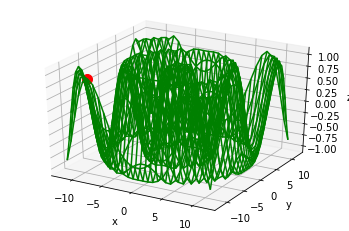

In [6]:
#%matplotlib notebook
def ploting_final(best_para):
    temp = max(abs(best_para[0]), abs(best_para[1]))
    low = -temp
    high = temp
    x = np.linspace(low, high, 30)
    y = np.linspace(low, high, 30)
    X, Y = np.meshgrid(x, y)
    Z = z_function(X, Y)
    x1 = best_para[0]; y1 = best_para[1]
    fig = plt.figure()
    ax = plt.axes(projection="3d")
    ax.plot_wireframe(X, Y, Z, color='green')
    ax.scatter(x1,y1,z_function(x1,y1), s = 100, color='red')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    plt.show()

    clear_output(wait=True)
ploting_final(best_para)

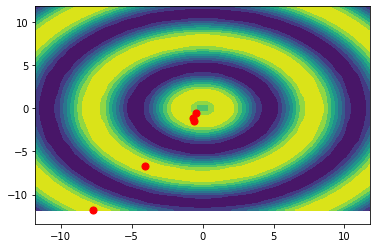

In [12]:
plt.contourf(X,Y,Z, levels=[*np.linspace(-1,1,10)])
plt.scatter(data[0],data[1],s = 50, color='red')
plt.show()

In [13]:
best_para

array([ -7.748937, -11.798936], dtype=float32)

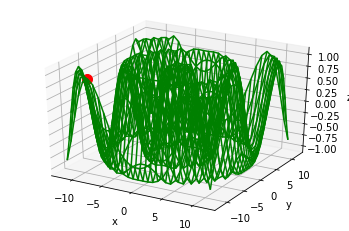

In [14]:
temp = max(abs(best_para[0]), abs(best_para[1]))
low = -temp
high = temp
x = np.linspace(low, high, 30)
y = np.linspace(low, high, 30)
X, Y = np.meshgrid(x, y)
Z = z_function(X, Y)
time.sleep(.1)
x1 = best_para[0]; y1 = best_para[1]
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot_wireframe(X, Y, Z, color='green')
ax.scatter(x1,y1,z_function(x1,y1), s = 100, color='red')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()
